In [361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from seaborn
df = sns.load_dataset('titanic')

In [363]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [365]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [367]:
# check null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [369]:
# change Columns name
missing = df.isnull().sum().reset_index()
missing.columns = ['Column', 'Missing Value Count']
missing

,Column,Missing Value Count
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


<Axes: >

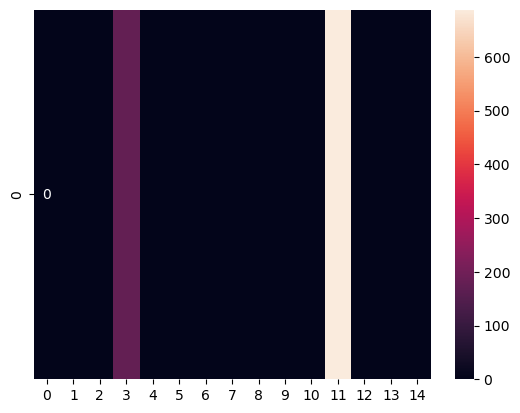

In [371]:
# heatmap
sns.heatmap([df.isnull().sum()],annot=True)

In [372]:
# column slicing
df['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [373]:
df['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [374]:
# check Unique Values
df["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [375]:
# Select Numerical and Categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [380]:
# Handling Missing Values
df['age'].fillna(df['age'].median(), inplace=True)  # Impute missing 'age' with median
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)  # Impute missing 'embarked' with mode


# Data Transformation

In [383]:
# Standardization
df[['age', 'fare']] = (df[['age', 'fare']] - df[['age', 'fare']].mean()) / df[['age', 'fare']].std()  
# Standardize 'age' and 'fare'


In [385]:
# Normalization 
# Min-Max Scaling
df[['age', 'fare']] = (df[['age', 'fare']] - df[['age', 'fare']].min()) / (df[['age', 'fare']].max() - df[['age', 'fare']].min())  
# Normalize 'age' and 'fare'


In [387]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,0.346569,1,2,0.045771,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0.321438,0,0,0.058556,C,First,man,True,C,Cherbourg,yes,True


# Encoding categorical variables

In [389]:
# Encoding categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Encode 'sex' as numerical values
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})  # Encode 'embarked' as numerical values
df["deck"]= df["deck"].map({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,np.NaN:0})


In [397]:
df["deck"].unique()

array([0, 3, 5, 7, 4, 1, 2, 6], dtype=int64)

In [406]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,0.271174,1,0,0.014151,0,Third,man,True,0,Southampton,no,False
1,1,1,1,0.472229,1,0,0.139136,1,First,woman,False,3,Cherbourg,yes,False
2,1,3,1,0.321438,0,0,0.015469,0,Third,woman,False,0,Southampton,yes,True
3,1,1,1,0.434531,1,0,0.103644,0,First,woman,False,3,Southampton,yes,False
4,0,3,0,0.434531,0,0,0.015713,0,Third,man,True,0,Southampton,no,True


# Outlier Detection

In [448]:
# Outlier Detection
for col in df.select_dtypes(include=[np.number]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])  # Replace outliers with median


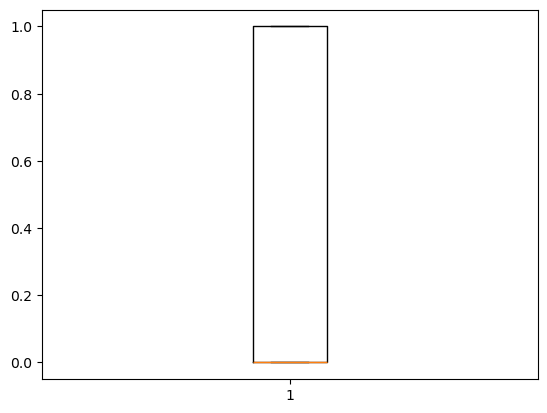

survived


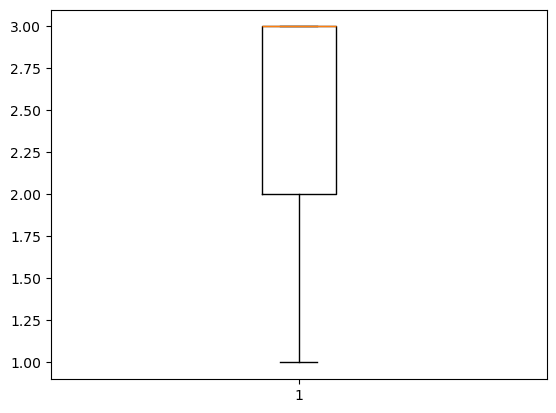

pclass


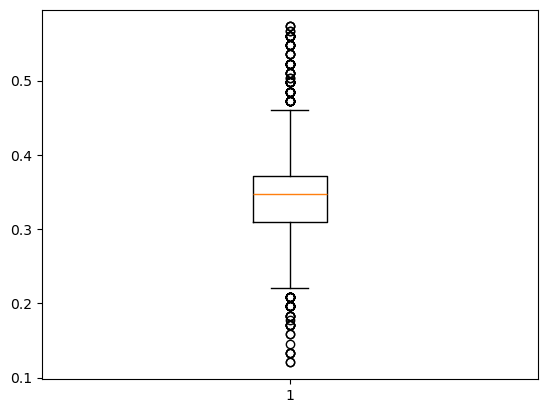

age


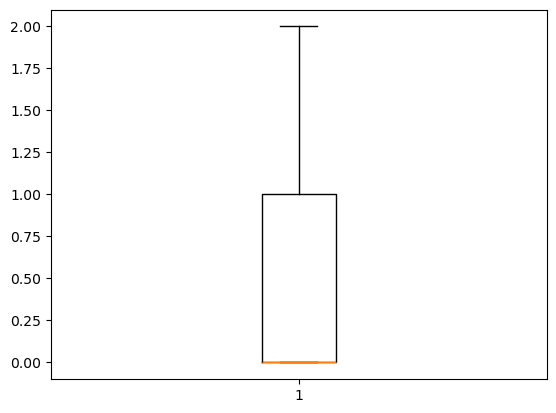

sibsp


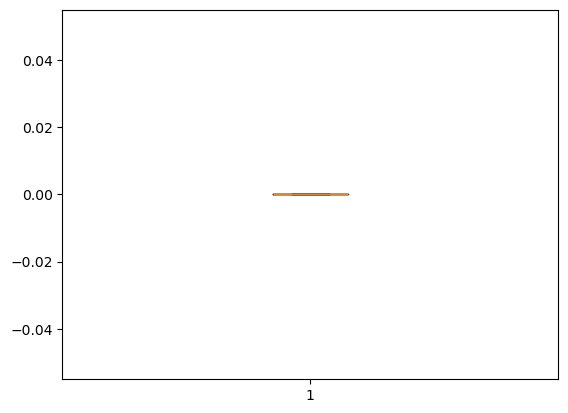

parch


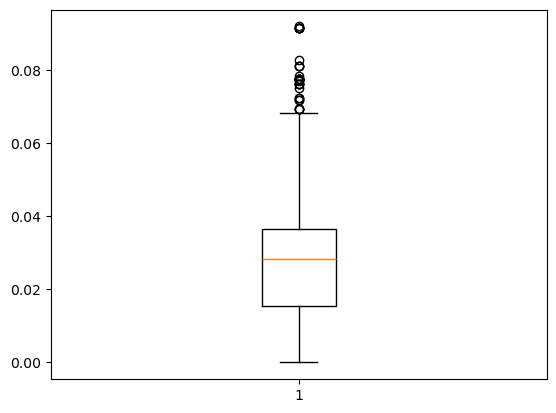

fare


In [450]:
for i in numerical_cols:
    plt.boxplot(df[i])
    plt.show()
    print(i)

# Outlier Detection and Handling

- replace value with nan(0) and than replace with median

In [ ]:
# Outlier Detection and Handling
for col in df.select_dtypes(include=[np.number]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

# Replace NaNs with suitable options (e.g., median of the column)
df.fillna(df.median(), inplace=True)

# 3.2. Data Exploration


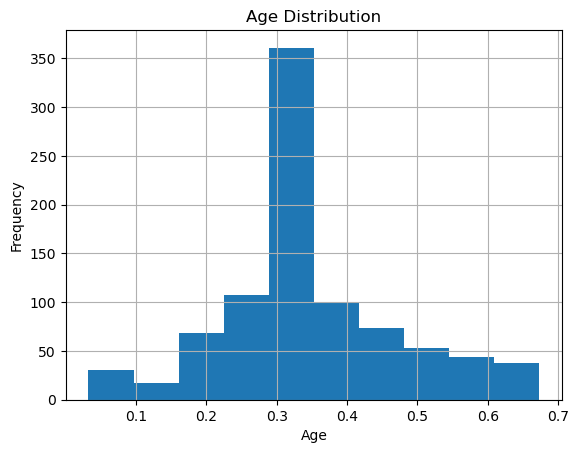

In [410]:
# 3.2. Data Exploration

# Univariate Analysis
df['age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()  # Plot age distribution histogram


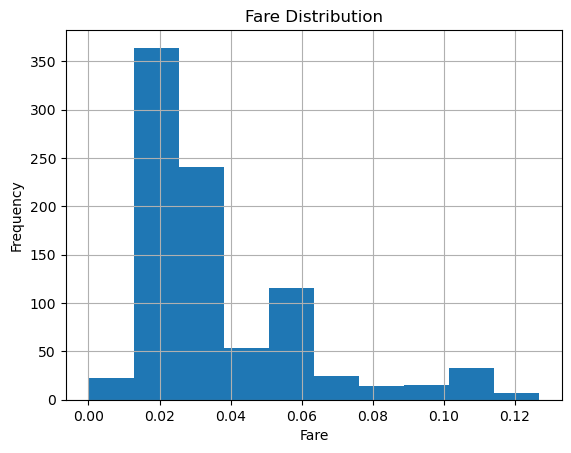

In [412]:
df['fare'].hist()
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()  # Plot fare distribution histogram

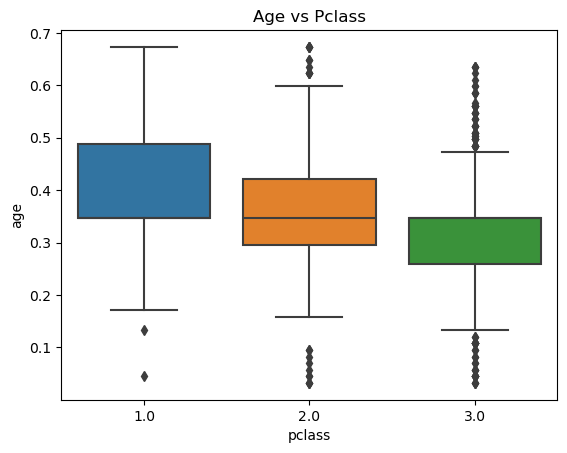

In [414]:
# Bivariate Analysis
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age vs Pclass')
plt.show()  # Boxplot of age vs passenger class

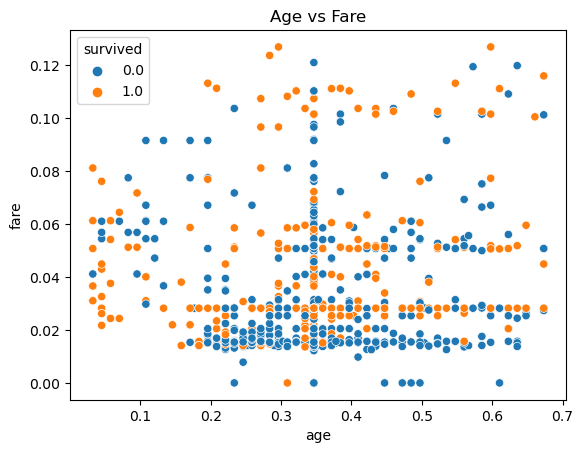

In [416]:
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title('Age vs Fare')
plt.show()  # Scatter plot of age vs fare colored by survival status


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

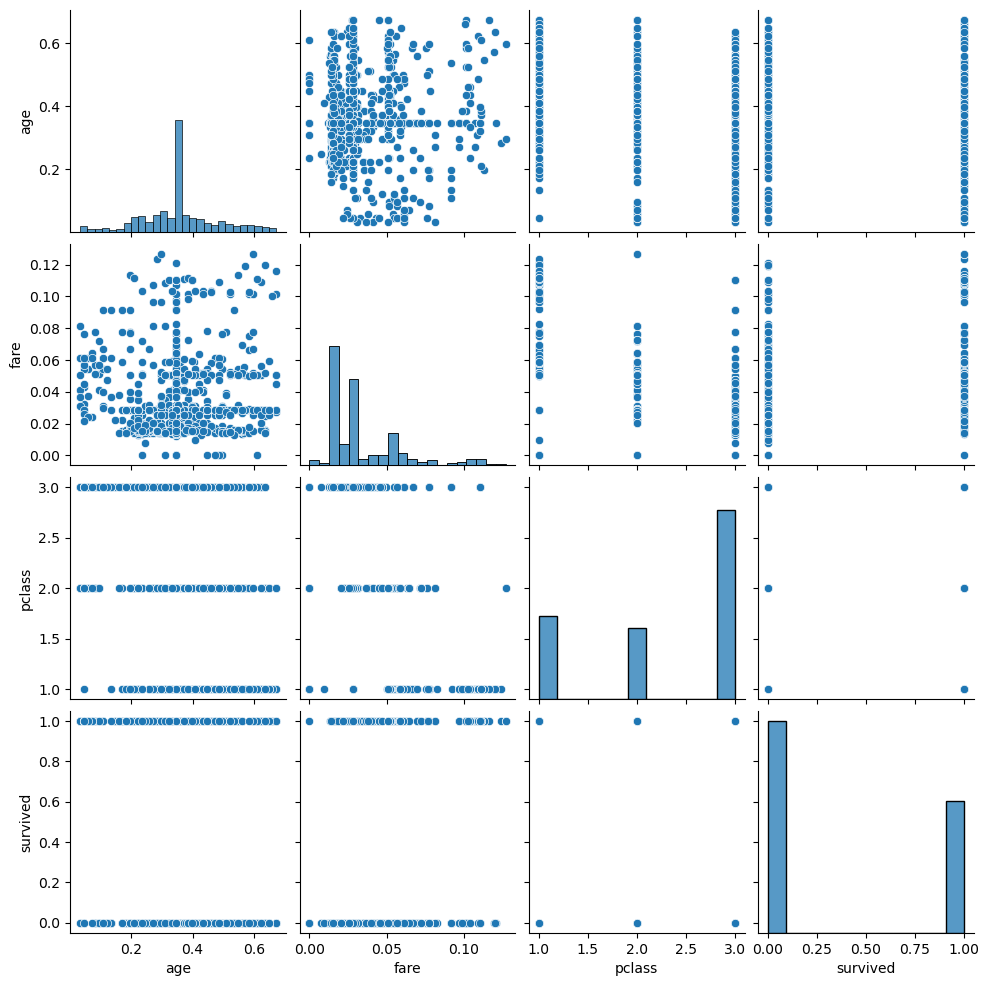

In [418]:
# Multivariate Analysis
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']])
plt.show()  # Pair plot for age, fare, passenger class, and survival status


C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


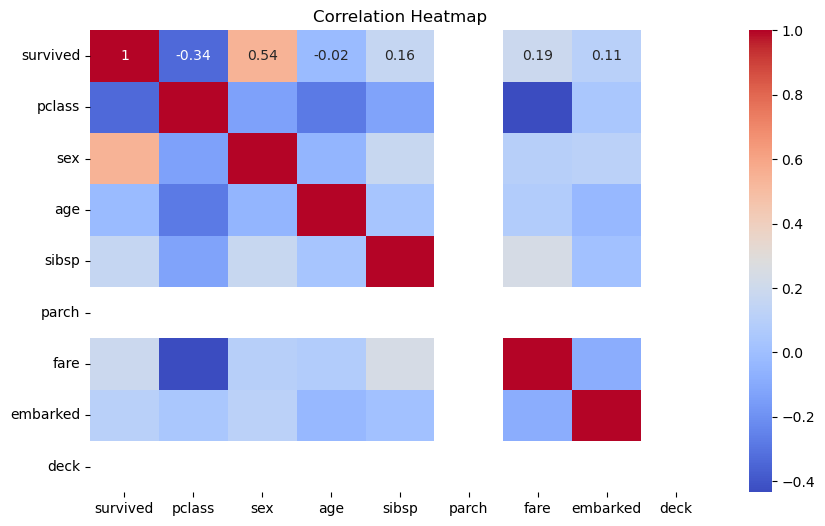

In [419]:
# Advanced Visualizations
# Filter numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Advanced Visualizations: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [420]:
# Feature Engineering
df['family_size'] = df['sibsp'] + df['parch'] + 1  
# Create new feature 'family_size'


In [421]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0.0,3.0,0.0,0.271174,1.0,0.0,0.014151,0.0,Third,man,True,0.0,Southampton,no,False,2.0
1,1.0,1.0,1.0,0.472229,1.0,0.0,0.028213,1.0,First,woman,False,0.0,Cherbourg,yes,False,2.0
2,1.0,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,Third,woman,False,0.0,Southampton,yes,True,1.0
3,1.0,1.0,1.0,0.434531,1.0,0.0,0.103644,0.0,First,woman,False,0.0,Southampton,yes,False,2.0
4,0.0,3.0,0.0,0.434531,0.0,0.0,0.015713,0.0,Third,man,True,0.0,Southampton,no,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.334004,0.0,0.0,0.025374,0.0,Second,man,True,0.0,Southampton,no,True,1.0
887,1.0,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,First,woman,False,0.0,Southampton,yes,True,1.0
888,0.0,3.0,1.0,0.346569,1.0,0.0,0.045771,0.0,Third,woman,False,0.0,Southampton,no,False,2.0
889,1.0,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,First,man,True,0.0,Cherbourg,yes,True,1.0


# Feature Selection

In [422]:
# Feature Selection
X = df.drop(['survived'], axis=1)
y = df['survived']


In [423]:
display(X)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,3.0,0.0,0.271174,1.0,0.0,0.014151,0.0,Third,man,True,0.0,Southampton,no,False,2.0
1,1.0,1.0,0.472229,1.0,0.0,0.028213,1.0,First,woman,False,0.0,Cherbourg,yes,False,2.0
2,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,Third,woman,False,0.0,Southampton,yes,True,1.0
3,1.0,1.0,0.434531,1.0,0.0,0.103644,0.0,First,woman,False,0.0,Southampton,yes,False,2.0
4,3.0,0.0,0.434531,0.0,0.0,0.015713,0.0,Third,man,True,0.0,Southampton,no,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,0.334004,0.0,0.0,0.025374,0.0,Second,man,True,0.0,Southampton,no,True,1.0
887,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,First,woman,False,0.0,Southampton,yes,True,1.0
888,3.0,1.0,0.346569,1.0,0.0,0.045771,0.0,Third,woman,False,0.0,Southampton,no,False,2.0
889,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,First,man,True,0.0,Cherbourg,yes,True,1.0


In [424]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

# Feature Selection using Correlation

In [425]:
# Feature Selection using Correlation
corr = numeric_df.corr()['survived'].sort_values(ascending=False)
print('Correlation with target:\n', corr)


Correlation with target:
 survived    1.000000
sex         0.543351
fare        0.190926
sibsp       0.160608
embarked    0.106811
age        -0.020426
pclass     -0.338481
parch            NaN
deck             NaN
Name: survived, dtype: float64


In [434]:
# Select features with correlation > 0.1 (this threshold can be adjusted)
selected_features = corr[corr > 0.1].index.to_list()
print('Selected features based on correlation: ', selected_features)

Selected features based on correlation:  ['survived', 'sex', 'fare', 'sibsp', 'embarked']


In [436]:
# Summary Statistics
df.describe()  # Display summary statistics

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000,891.000000,891.0,891.000000
mean,0.383838,2.308642,0.352413,0.352563,0.297419,0.0,0.033931,0.361392,0.0,1.297419
std,0.486592,0.836071,0.477990,0.123066,0.521648,0.0,0.024814,0.635673,0.0,0.521648
min,0.000000,1.000000,0.000000,0.032420,0.000000,0.0,0.000000,0.000000,0.0,1.000000
25%,0.000000,2.000000,0.000000,0.293164,0.000000,0.0,0.015440,0.000000,0.0,1.000000
50%,0.000000,3.000000,0.000000,0.346569,0.000000,0.0,0.028213,0.000000,0.0,1.000000
75%,1.000000,3.000000,1.000000,0.409399,1.000000,0.0,0.047138,1.000000,0.0,2.000000
max,1.000000,3.000000,1.000000,0.673285,2.000000,0.0,0.126872,2.000000,0.0,3.000000


In [438]:
# Save the cleaned dataset
df.to_csv('cleaned_titanic_dataset.csv', index=False)  # Save cleaned dataset to CSV


In [440]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0.0,3.0,0.0,0.271174,1.0,0.0,0.014151,0.0,Third,man,True,0.0,Southampton,no,False,2.0
1,1.0,1.0,1.0,0.472229,1.0,0.0,0.028213,1.0,First,woman,False,0.0,Cherbourg,yes,False,2.0
2,1.0,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,Third,woman,False,0.0,Southampton,yes,True,1.0
3,1.0,1.0,1.0,0.434531,1.0,0.0,0.103644,0.0,First,woman,False,0.0,Southampton,yes,False,2.0
4,0.0,3.0,0.0,0.434531,0.0,0.0,0.015713,0.0,Third,man,True,0.0,Southampton,no,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.334004,0.0,0.0,0.025374,0.0,Second,man,True,0.0,Southampton,no,True,1.0
887,1.0,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,First,woman,False,0.0,Southampton,yes,True,1.0
888,0.0,3.0,1.0,0.346569,1.0,0.0,0.045771,0.0,Third,woman,False,0.0,Southampton,no,False,2.0
889,1.0,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,First,man,True,0.0,Cherbourg,yes,True,1.0


In [442]:
numeric_values=["survived",	"pclass","sex",	"age","sibsp","parch","fare","embarked","deck","family_size"]

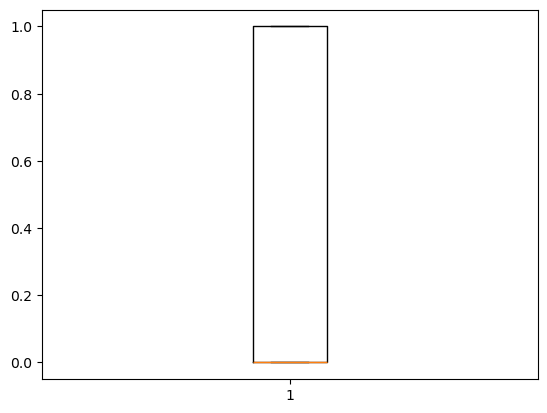

survived


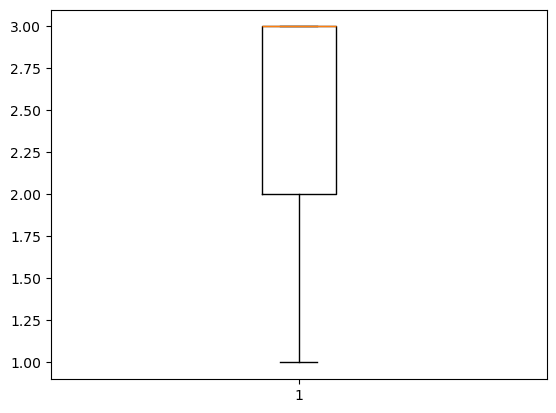

pclass


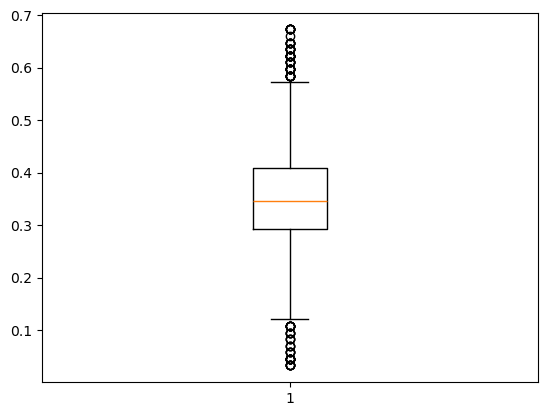

age


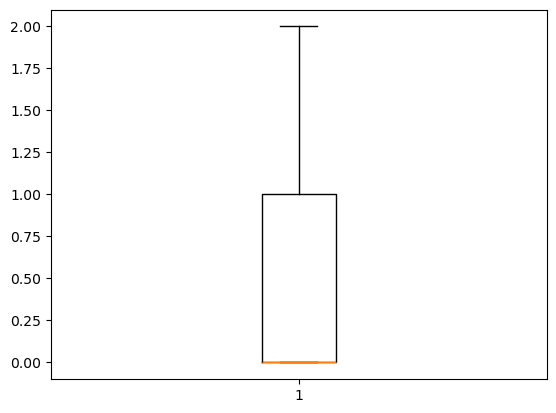

sibsp


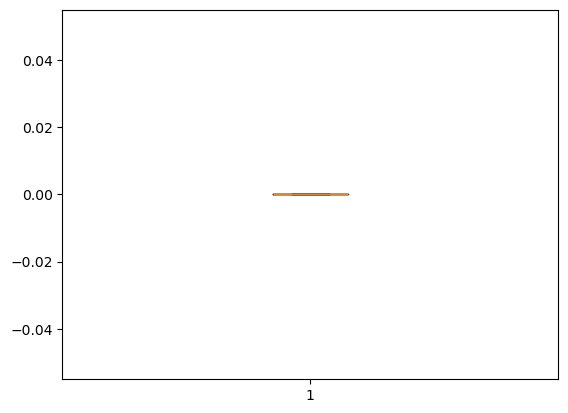

parch


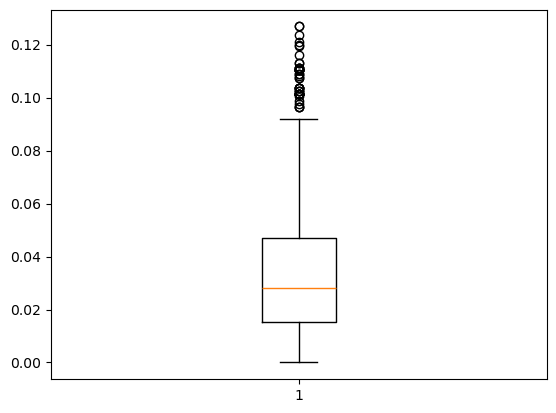

fare


In [446]:
for i in numerical_cols:
    plt.boxplot(df[i])
    plt.show()
    print(i)

In [244]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0.0,3.0,0.0,0.271174,1.0,0.0,0.014151,0.0,Third,man,True,0.0,Southampton,no,False,2.0
1,1.0,1.0,1.0,NaN,1.0,0.0,0.028213,1.0,First,woman,False,0.0,Cherbourg,yes,False,2.0
2,1.0,3.0,1.0,0.321438,0.0,0.0,0.015469,0.0,Third,woman,False,0.0,Southampton,yes,True,1.0
3,1.0,1.0,1.0,0.434531,1.0,0.0,0.028213,0.0,First,woman,False,0.0,Southampton,yes,False,2.0
4,0.0,3.0,0.0,0.434531,0.0,0.0,0.015713,0.0,Third,man,True,0.0,Southampton,no,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.334004,0.0,0.0,0.025374,0.0,Second,man,True,0.0,Southampton,no,True,1.0
887,1.0,1.0,1.0,0.233476,0.0,0.0,0.058556,0.0,First,woman,False,0.0,Southampton,yes,True,1.0
888,0.0,3.0,1.0,0.346569,1.0,0.0,0.045771,0.0,Third,woman,False,0.0,Southampton,no,False,2.0
889,1.0,1.0,0.0,0.321438,0.0,0.0,0.058556,1.0,First,man,True,0.0,Cherbourg,yes,True,1.0


In [456]:
# categorical - categorical bivariate analysis
pd.crosstab(df["survived"],df["pclass"])

pclass,1.0,2.0,3.0
survived,,,
0.0,80,97,372
1.0,136,87,119


<Axes: xlabel='pclass', ylabel='survived'>

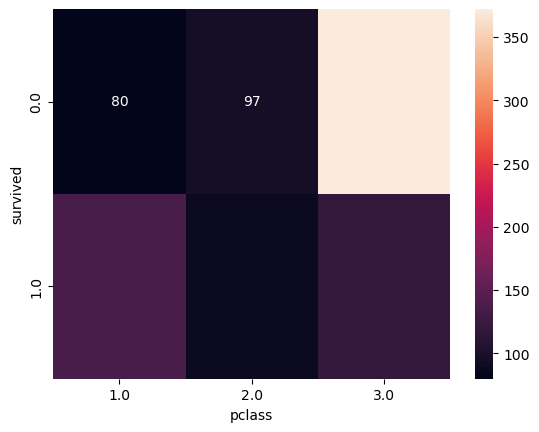

In [466]:
sns.heatmap(pd.crosstab(df["survived"],df["pclass"]),annot=True)

# Export Clean Data into new csv file

In [474]:
df[selected_features + categorical_cols].to_csv('cleaned_titanic_dataset.csv', index=False)

In [479]:
# laod export file
pd.read_csv("cleaned_titanic_dataset.csv")

,survived,sex,fare,sibsp,embarked,sex.1,embarked.1,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,0.0,0.014151,1.0,0.0,0.0,0.0,Third,man,True,0.0,Southampton,no,False
1,1.0,1.0,0.028213,1.0,1.0,1.0,1.0,First,woman,False,0.0,Cherbourg,yes,False
2,1.0,1.0,0.015469,0.0,0.0,1.0,0.0,Third,woman,False,0.0,Southampton,yes,True
3,1.0,1.0,0.028213,1.0,0.0,1.0,0.0,First,woman,False,0.0,Southampton,yes,False
4,0.0,0.0,0.015713,0.0,0.0,0.0,0.0,Third,man,True,0.0,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.025374,0.0,0.0,0.0,0.0,Second,man,True,0.0,Southampton,no,True
887,1.0,1.0,0.058556,0.0,0.0,1.0,0.0,First,woman,False,0.0,Southampton,yes,True
888,0.0,1.0,0.045771,1.0,0.0,1.0,0.0,Third,woman,False,0.0,Southampton,no,False
889,1.0,0.0,0.058556,0.0,1.0,0.0,1.0,First,man,True,0.0,Cherbourg,yes,True


# Merge 2 Tables or Dataset

In [503]:
# Load Titanic dataset from seaborn
df_titanic = sns.load_dataset('titanic')

# Example additional dataset
df_additional = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],  # Assuming these IDs correspond to Titanic passengers
    'cabin_quality': ['A', 'B', 'C', 'D', 'E']
})



In [504]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [507]:
df_additional

,id,cabin_quality
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


In [517]:
# Since Titanic dataset does not have 'passenger_id', we will add an 'id' column for demonstration
df_titanic['id'] = range(1, len(df_titanic) + 1)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,id
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,4
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,887
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,888
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,889
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,890


In [513]:
# Merge Titanic dataset with additional dataset
merged_titanic = pd.merge(df_titanic, df_additional, left_on='id', right_on='id', how='left')
merged_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,id,cabin_quality
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,A
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,B
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3,C
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,4,D
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,5,E


# Black Friday Dataset

In [320]:
train=pd.read_csv(r"C:\Users\nisha\Desktop\Ducat\EDA Project\Black Friday\train.csv")
test=pd.read_csv(r"C:\Users\nisha\Desktop\Ducat\EDA Project\Black Friday\test.csv")

# Joining/ Concate 2 dataset

In [342]:
df1=pd.concat([train,test])
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Replace Values

In [343]:
# Replace Values

# Method 1
df1["Stay_In_Current_City_Years"].replace("4+","4",inplace=True)

# method 2
df1["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")
df1["Stay_In_Current_City_Years"]

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

# Change datatype (dtype)

In [345]:
# Change datatype (dtype)
df1["Stay_In_Current_City_Years"].astype("int")

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: int32

# Handle missing values which are repeated with mode of the columns


In [348]:
# Handle missing values which are repeated with mode of the columns

df1["Product_Category_2"].unique()

df1["Product_Category_2"].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [350]:
df1["Product_Category_2"]=df1["Product_Category_2"].fillna(df1["Product_Category_2"].mode()[0])

In [352]:
df1["Product_Category_3"]=df1["Product_Category_3"].fillna(df1["Product_Category_3"].mode()[0])

In [353]:
df1["Age"].unique()

n=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
n.sort()


In [356]:
df1["Age"]=df["Age"].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [358]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,NaN,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,F,NaN,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,NaN,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,F,NaN,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,M,NaN,16,C,4,0,8,8.0,16.0,7969.0
